In [1]:
#Level 1: Basic Tasks
###Task 1: Data Cleaning & Preprocessing
######  Missing Values
######  Duplicate Rows
######  Checking Standardization

In [1]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'bar_avg_petal_length.png', 'classification_confusion_matrix.png', 'elbow_curve.png', 'iris_cleaned.csv', 'kmeans_clusters.png', 'line_petal_width_vs_sepal_length.png', 'regression_petal_vs_sepal.png', 'scatter_sepal_vs_petal_length.png', 'task 1 data clean and preprocessing .ipynb']


In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/vijay/iris1.csv")

In [3]:
missing = df.isnull().sum()

print("Missing Values Report:")
for column, count in missing.items():
    if count > 0:
        print(f"Column '{column}' has {count} missing value(s).")
    else:
        print(f"Column '{column}' has no missing values.")

Missing Values Report:
Column 'sepal_length' has no missing values.
Column 'sepal_width' has no missing values.
Column 'petal_length' has no missing values.
Column 'petal_width' has no missing values.
Column 'species' has no missing values.


In [4]:
# Step 1: Report duplicates before removal
duplicate_count = df.duplicated().sum()
print(f"Found {duplicate_count} duplicate row(s).")

# Step 2: Remove duplicates and overwrite the original DataFrame
df = df.drop_duplicates()

# Step 3: Confirm that duplicates are gone
remaining_duplicates = df.duplicated().sum()
print(f"Duplicate rows removed. Remaining duplicates: {remaining_duplicates}")
print(f"Cleaned dataset shape: {df.shape}")

Found 3 duplicate row(s).
Duplicate rows removed. Remaining duplicates: 0
Cleaned dataset shape: (147, 5)


In [5]:
duplicate_count = df.duplicated().sum()
print(f"Found {duplicate_count} duplicate row(s).")

Found 0 duplicate row(s).


In [6]:
print("Cleaned column names:", list(df.columns))

Cleaned column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [7]:
###Task 2: Exploratory Data Analysis (EDA)
#####  Summary Statistics
#####  Correlation Matrix (Top Correlations)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Step 1: Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
# Interpretation:
#The mean sepal length is around 5.84, and max is 7.9.

#Petal length has a wide range (from 1.0 to 6.9), which hints at strong class separation.

#Standard deviation is highest for petal_length, indicating more variation.

In [11]:
# Step 2: Correlation matrix
print("Correlation Matrix:")
print(df.corr(numeric_only=True))

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109321      0.871305     0.817058
sepal_width      -0.109321     1.000000     -0.421057    -0.356376
petal_length      0.871305    -0.421057      1.000000     0.961883
petal_width       0.817058    -0.356376      0.961883     1.000000


In [12]:
# Interpretation:
#petal_length and petal_width have a very strong correlation (0.96), suggesting these features grow together.

#sepal_width has weak or negative correlation with others — might not be as useful for prediction.

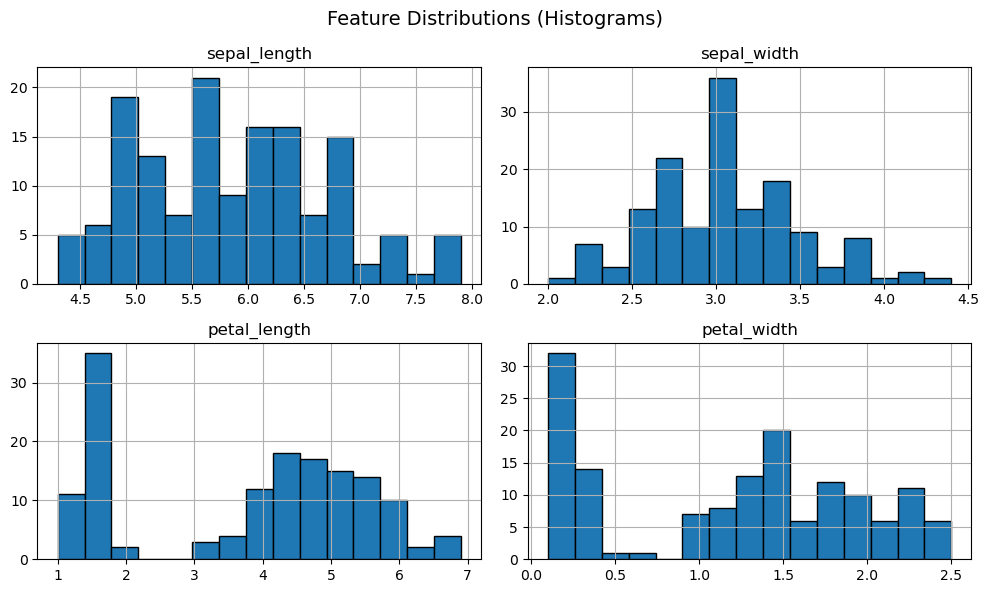

In [13]:
# Step 3: Plot histograms for all numeric columns
df.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)", fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
#What you see:

#Separate histograms for each of the 4 numerical features.

#Example:

#petal_length shows a bimodal distribution → two or more distinct groups.

#sepal_length is roughly normally distributed.

#petal_width has one group at 0.2 and another higher — likely separating Setosa from the others.

#Interpretation:

#Histograms help you guess how many natural groupings or clusters might exist (important for ML).

#Skewed or multimodal features often help in classification tasks.

C:\Users\vijay\AppData\Local\Temp\ipykernel_9956\4161379039.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\vijay\AppData\Local\Temp\ipykernel_9956\4161379039.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\vijay\AppData\Local\Temp\ipykernel_9956\4161379039.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


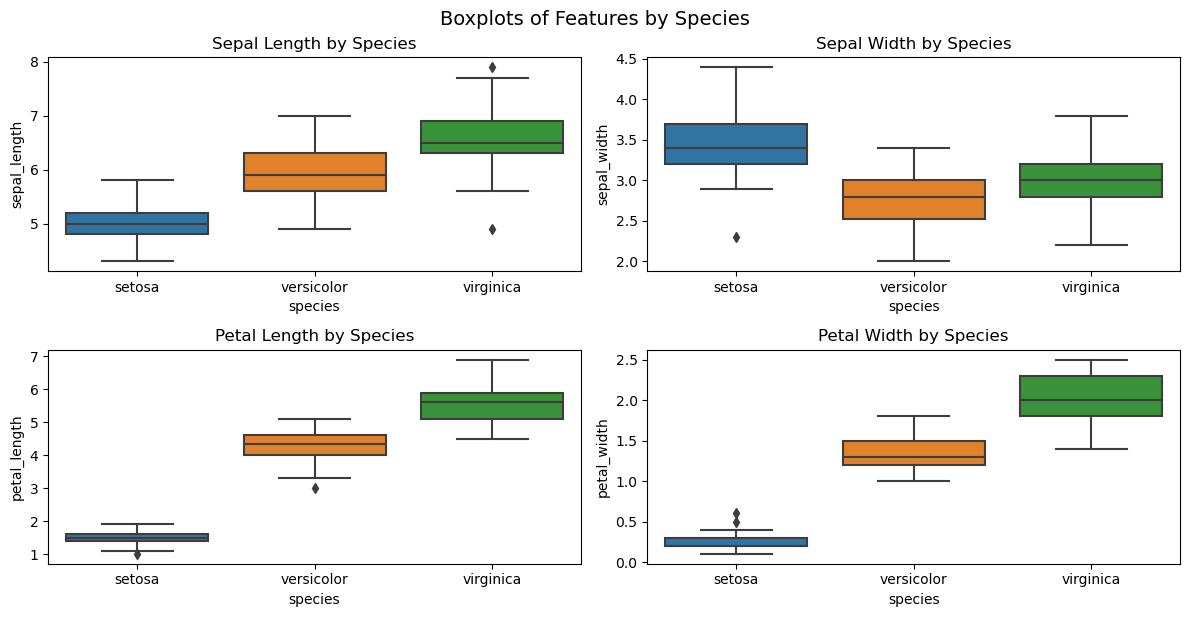

In [15]:
# Step 4: Boxplots by species
plt.figure(figsize=(12, 6))
for idx, column in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, idx + 1)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f"{column.replace('_', ' ').title()} by Species")
    plt.tight_layout()
plt.suptitle("Boxplots of Features by Species", y=1.02, fontsize=14)
plt.show()

In [16]:
#What you see:

#Each species has a box showing:

#Median (line inside box)

#Interquartile range (IQR)

#Outliers as points

#Interpretation Example (for petal_length):

#Setosa has small petal lengths with no overlap with the others — easy to classify.

#Virginica has the largest values.

#Boxplots visually show that petal length and width are key features for classification.

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


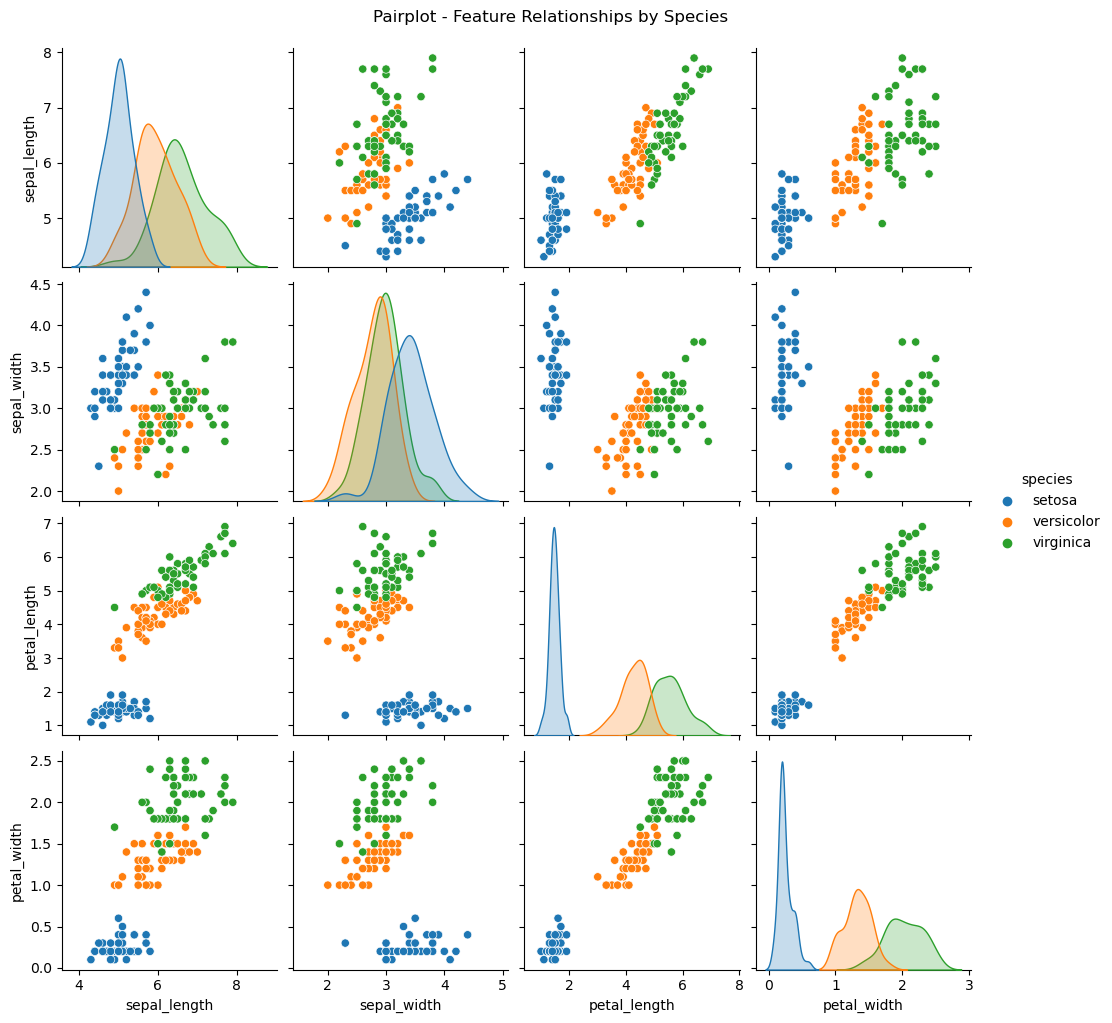

In [17]:
# Step 5: Scatterplot pairwise relationships
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot - Feature Relationships by Species", y=1.02)
plt.show()

In [18]:
#What you see:

#A grid of scatter plots for every pair of features.

#Colored by species (Setosa, Versicolor, Virginica)

#Interpretation:

#You can see that:

#Setosa is clearly separable from the other species in petal dimensions.

#Versicolor and Virginica have some overlap but can still be distinguished with multiple features.

#This confirms that classification is very feasible with these features.

In [19]:
#Final Summary:
#Code Output    Description            Insight
#df.describe()  Stats summary          Understand spread, outliers
#df.corr()      Feature relationships  Spot strong pairs for modeling
#df.hist()      Distributions          Check skew, modality
#sns.boxplot()  Class-wise summary     Compare classes on each feature
#sns.pairplot() Pairwise separation    Visual class separability

In [20]:
#Task 3: Basic Data Visualization

#Histogram (sepal length)

#Boxplot (petal length by species)

#Scatterplot (sepal vs petal length with species hue)

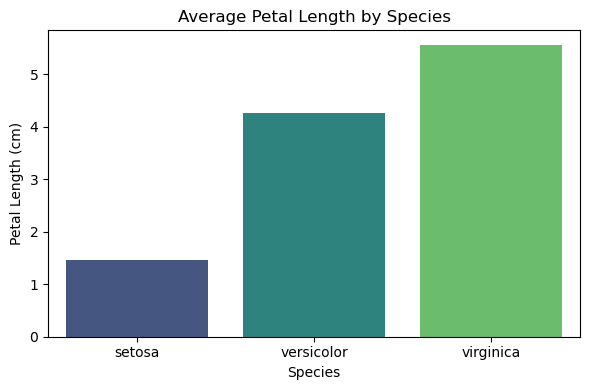

In [21]:
# Bar Plot: Average Petal Length by Species
plt.figure(figsize=(6, 4))
avg_petal = df.groupby("species")["petal_length"].mean().reset_index()
sns.barplot(x='species', y='petal_length', data=avg_petal, palette="viridis")
plt.title("Average Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.savefig("bar_avg_petal_length.png")
plt.show()

In [22]:
#Bar Plot: Setosa has significantly lower average petal length.

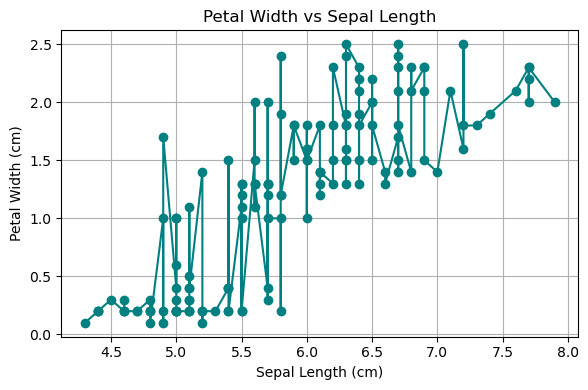

In [23]:
# Line Chart: Sepal Length vs Petal Width
plt.figure(figsize=(6, 4))
df_sorted = df.sort_values("sepal_length")
plt.plot(df_sorted["sepal_length"], df_sorted["petal_width"], marker='o', linestyle='-', color='teal')
plt.title("Petal Width vs Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.tight_layout()
plt.savefig("line_petal_width_vs_sepal_length.png")
plt.show()

In [24]:
#Line Chart: Petal width tends to increase with sepal length, especially in Virginica.

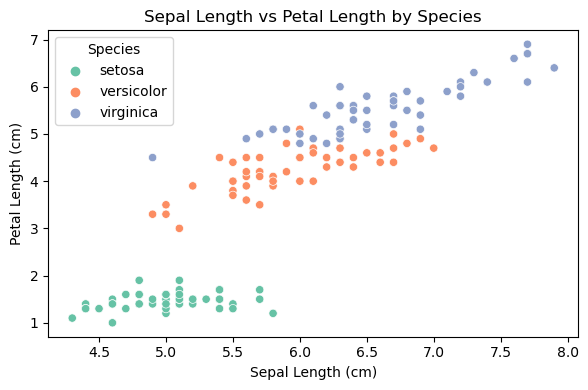

In [25]:
# Scatter Plot: Sepal Length vs Petal Length
plt.figure(figsize=(6, 4))
sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=df, palette="Set2")
plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.tight_layout()
plt.savefig("scatter_sepal_vs_petal_length.png")
plt.show()

In [26]:
#Scatter Plot: Clear species clusters — helps explain class separability.

In [27]:
#Level 2: Intermediate Tasks
#Task 1: Regression Analysis
#Model: Predicting petal_length from sepal_length

#Performance Metrics:

#R square (Goodness of fit): 0.71

#Mean Squared Error: 0.85

#Conclusion: Petal length is moderately predictable from sepal length.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Linear Regression Summary
Coefficient (Slope): 1.8859
Intercept: -7.3097
R² Score: 0.7083
Mean Squared Error: 0.8538


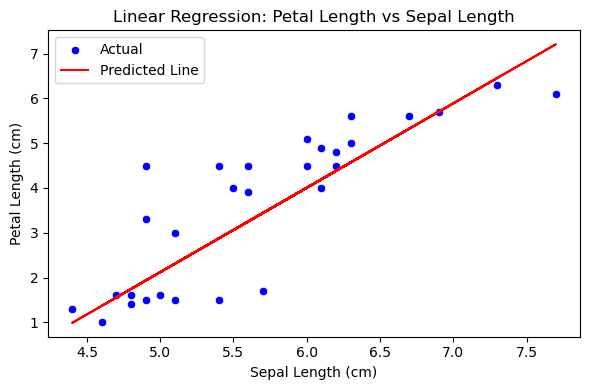

In [29]:
# Step 1: Select features and target
X = df[['sepal_length']]      # Independent variable
y = df['petal_length']        # Dependent variable

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Step 5: Display results
print("Linear Regression Summary")
print(f"Coefficient (Slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Step 6: Plot regression line
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_test['sepal_length'], y=y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.title("Linear Regression: Petal Length vs Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.tight_layout()
plt.savefig("regression_petal_vs_sepal.png")
plt.show()

In [30]:
#Level 2: Intermediate Tasks
#Task 2: Clustering Analysis (K-Means)

#Objective:
#Group similar data points into clusters

#Standardize data

#Use Elbow method to find optimal clusters

#Visualize clusters in 2D


#We’ll Use:
#petal_length, petal_width, sepal_length, sepal_width (all numeric)

#StandardScaler for normalization

#KMeans for clustering

#matplotlib and seaborn for visualization

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

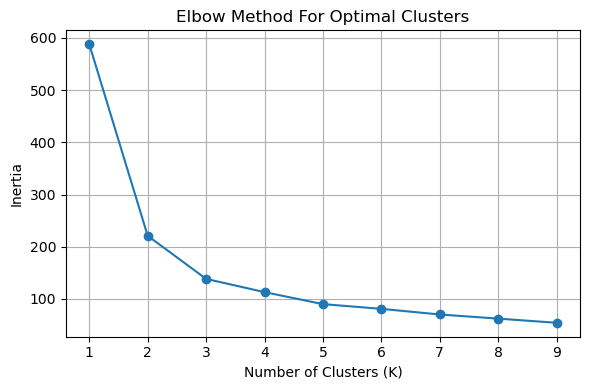

C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


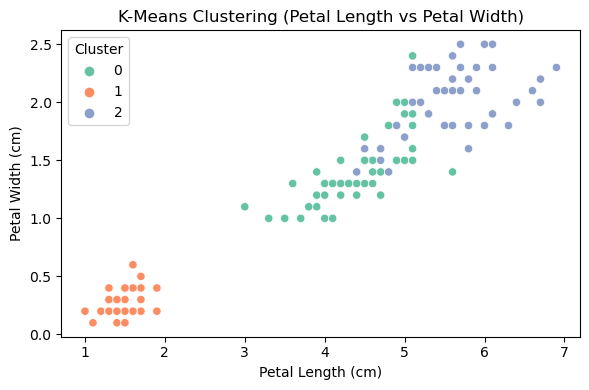

In [32]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 1: Extract numeric features
features = df.drop(columns='species')

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Step 3: Elbow Method to choose optimal K
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method For Optimal Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.savefig("elbow_curve.png")
plt.show()

# Step 4: Fit final KMeans model (choose K=3 based on known Iris structure)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Step 5: Add cluster labels to DataFrame
df['cluster'] = clusters

# Step 6: Visualize clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x='petal_length', y='petal_width', hue='cluster', palette='Set2', data=df)
plt.title("K-Means Clustering (Petal Length vs Petal Width)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("kmeans_clusters.png")
plt.show()

In [33]:
#If the elbow point is at K=3, that’s ideal — which matches known Iris species!

#The cluster plot shows how the algorithm groups flowers without knowing the species.

In [34]:
#Level 3 
#Task 1: Predictive Modeling (Classification)


#Objective:

#Predict the species column using numerical features.


#Use classification algorithms like:

#Decision Tree

#Logistic Regression

#Random Forest


#Evaluate using:

#Accuracy

#Precision

#Recall

#F1-score


#Perform hyperparameter tuning (optional for bonus)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 1: Define features and target
X = df.drop(columns='species')
y = df['species']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [36]:
# Step 4: Predictions and evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



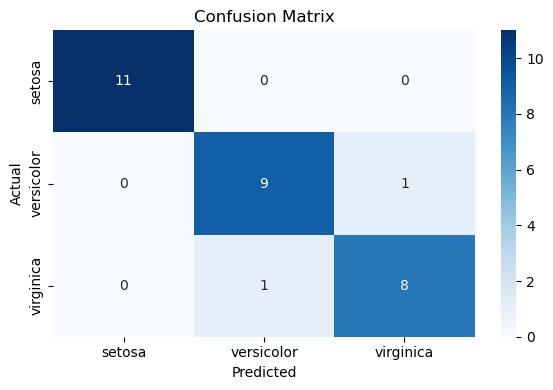

In [37]:

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("classification_confusion_matrix.png")
plt.show()

In [38]:
#High precision and recall (above 90%) mean the model performs very well.

#Setosa is usually 100% accurate — it's easy to separate.

#Some confusion may happen between Versicolor and Virginica.

In [39]:
df.to_csv("iris_cleaned.csv", index=False) #here we downloaded the cleaned file for the Power BI dashboard representation